# 第6回目の着順予想
- 21/04/11に作成開始
- 過去レースから算出した、各枠からの1-3着率を特徴量に追加
- 過去レースから算出した、その枠からの平均start timeを特徴量に追加

In [1]:
import pandas as pd

## 1. データ準備
### 1.1 データロード

In [2]:
race_df = pd.read_pickle('../../../data/arrangedData/race_df_w_stocastic_3.pkl').reset_index(drop=True)
# 中身を確認
race_df

,date,venue,raceNumber,枠,racer_id,racer_class,racer_name,num_false_start,num_late_start,motorNo,...,着順,タイム,start_time,weather_曇り,weather_雨,weather_雪,1着率,2着率,3着率,average_start_time
0,2020-11-01,下 関,1.0,1,4060,2,島田 一生,0,0,35,...,1,"1'48""4",0.11,1,0,0,NaN,NaN,NaN,NaN
1,2020-11-01,下 関,1.0,2,3680,3,森林 太,0,0,37,...,2,"1'50""8",0.17,1,0,0,NaN,NaN,NaN,NaN
2,2020-11-01,下 関,1.0,3,3123,3,中西 宏文,0,0,66,...,5,,0.09,1,0,0,NaN,NaN,NaN,NaN
3,2020-11-01,下 関,1.0,4,5001,3,坂本 雅佳,0,0,20,...,4,"1'53""9",0.14,1,0,0,NaN,NaN,NaN,NaN
4,2020-11-01,下 関,1.0,5,4219,3,本岡 勝利,0,0,60,...,3,"1'52""1",0.17,1,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124957,2021-03-29,蒲 郡,11.0,2,3596,3,河上 年昭,0,0,67,...,4,"1'53""1",0.23,0,0,0,0.000000,0.466667,0.066667,0.172667
124958,2021-03-29,蒲 郡,11.0,3,4512,1,高野 哲史,0,0,19,...,1,"1'49""1",0.17,0,0,0,0.076923,0.307692,0.153846,0.199231
124959,2021-03-29,蒲 郡,11.0,4,4118,1,宇佐見 淳,0,0,39,...,6,,0.16,0,0,0,0.100000,0.150000,0.300000,0.146000
124960,2021-03-29,蒲 郡,11.0,5,4016,2,西川 新太郎,1,0,38,...,3,"1'52""4",0.12,0,0,0,0.000000,0.000000,0.142857,0.200000


### 1.2 過去レースが意味のある部分（dfの後ろの方だけ）を使う

In [3]:
race_df = race_df[race_df["date"] > "2021-03-15"]
race_df

,date,venue,raceNumber,枠,racer_id,racer_class,racer_name,num_false_start,num_late_start,motorNo,...,着順,タイム,start_time,weather_曇り,weather_雨,weather_雪,1着率,2着率,3着率,average_start_time
112008,2021-03-16,びわこ,1.0,1,4233,2,亀山 雅幸,0,0,29,...,1,"1'49""8",0.19,1,0,0,0.400000,0.500000,0.050000,0.160500
112009,2021-03-16,びわこ,1.0,2,4438,3,森作 雄大,1,0,65,...,2,"1'51""5",0.27,1,0,0,0.076923,0.307692,0.076923,0.140769
112010,2021-03-16,びわこ,1.0,3,4458,3,抹香 雄三,0,0,31,...,4,"1'54""1",0.24,1,0,0,0.157895,0.052632,0.210526,0.168947
112011,2021-03-16,びわこ,1.0,4,3401,3,上田 隆章,0,0,32,...,5,,0.39,1,0,0,0.062500,0.250000,0.062500,0.191875
112012,2021-03-16,びわこ,1.0,5,3459,3,中野 和裕,0,0,23,...,3,"1'52""7",0.27,1,0,0,0.000000,0.181818,0.090909,0.187273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124957,2021-03-29,蒲 郡,11.0,2,3596,3,河上 年昭,0,0,67,...,4,"1'53""1",0.23,0,0,0,0.000000,0.466667,0.066667,0.172667
124958,2021-03-29,蒲 郡,11.0,3,4512,1,高野 哲史,0,0,19,...,1,"1'49""1",0.17,0,0,0,0.076923,0.307692,0.153846,0.199231
124959,2021-03-29,蒲 郡,11.0,4,4118,1,宇佐見 淳,0,0,39,...,6,,0.16,0,0,0,0.100000,0.150000,0.300000,0.146000
124960,2021-03-29,蒲 郡,11.0,5,4016,2,西川 新太郎,1,0,38,...,3,"1'52""4",0.12,0,0,0,0.000000,0.000000,0.142857,0.200000


### 1.3 1-6枠のデータを1行にまとめ, inputにできない列を一部削除

In [4]:
# レースごとに一つの情報しか持たない列と、枠番ごとに異なる情報をもつ列を分けて別のdfとする(date, venue, racenumberはindex的に用いる)
race_df_frame = race_df[['date', 'venue', 'raceNumber', '枠', 'num_false_start', 'num_late_start',
       'racer_class', 'ボート2連率', 'ボート3連率', 'モーター2連率', 'モーター3連率',
       'exhibitionTime', 'exhibition_ST', 'exhibition_cource', 'flying',
       'late', 'tilt', 'weight', '1着率', '2着率', '3着率', '着順', "average_start_time"
                       ]].set_index(['date', 'venue', 'raceNumber'])

race_df_race = race_df[['date', 'venue', 'raceNumber',
       'temperature', 'water_temperature', 'wave_height',
                       'wind_speed', 'weather_曇り', 'weather_雨', 'weather_雪',
                      ]]
race_df_race.drop_duplicates(inplace=True)
race_df_race.set_index(['date', 'venue', 'raceNumber'], inplace=True)

# 枠番ごとに異なる情報をもつ列について、枠番ごとのdfに分類した後で行方向にconcat
race_df_frame_list = []
for frame in range(1, 7):
    # 枠番を列名の末尾に付与
    race_df_frame_ = race_df_frame[race_df_frame["枠"]==frame].add_suffix("_{0}".format(frame))
    race_df_frame_list.append(race_df_frame_)

race_df_merged = pd.concat(race_df_frame_list, axis=1)

# レースごとに一つの情報しか持たない列をマージ
race_df_merged = pd.concat([race_df_merged, race_df_race], axis=1)
race_df_merged

<ipython-input-4-32043ff34a4b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_df_race.drop_duplicates(inplace=True)


枠_1  num_false_start_1  num_late_start_1  \
date       venue raceNumber                                             
2021-03-16 びわこ   1.0           1                  0                 0   
                 2.0           1                  0                 0   
                 3.0           1                  0                 0   
                 4.0           1                  1                 0   
                 5.0           1                  0                 0   
...                          ...                ...               ...   
2021-03-29 蒲　郡   7.0           1                  0                 0   
                 8.0           1                  0                 0   
                 9.0           1                  1                 0   
                 10.0          1                  0                 0   
                 11.0          1                  0                 0   

                             racer_class_1  ボート2連率_1  ボート3連率_1  モーター2連率_1  \
date       venue raceNumber                                                 
2021-03-16 びわこ   1.0                     2     38.27     53.70      39.52   
                 2.0                     2     29.01     43.83      30.61   
                 3.0                     2     37.78     53.89      23.97   
                 4.0                     3     32.52     51.53      30.00   
                 5.0                     2     35.36     49.72      36.48   
...                                    ...       ...       ...        ...   
2021-03-29 蒲　郡   7.0                     1     28.33     47.22      35.87   
                 8.0                     2     30.10     42.86      35.68   
                 9.0                     1     27.95     46.58      30.81   
                 10.0                    1     32.97     50.55      34.60   
                 11.0                    1     33.85     53.33      35.81   

                             モーター3連率_1  exhibitionTime_1  exhibition_ST_1  \
date       venue raceNumber                                                 
2021-03-16 びわこ   1.0             53.81              6.74             0.13   
                 2.0             47.96              6.62             0.16   
                 3.0             44.52              6.70             0.25   
                 4.0             46.00              6.61             0.37   
                 5.0             47.80              6.66             0.14   
...                                ...               ...              ...   
2021-03-29 蒲　郡   7.0             50.22              6.71             0.01   
                 8.0             53.77              6.82             0.04   
                 9.0             46.45              6.82             0.05   
                 10.0            51.66              6.83             0.08   
                 11.0            54.59              6.80             0.07   

                             ...     3着率_6  着順_6  average_start_time_6  \
date       venue raceNumber  ...                                         
2021-03-16 びわこ   1.0         ...  0.026316     6              0.201053   
                 2.0         ...  0.142857     6              0.226429   
                 3.0         ...  0.000000     4              0.165556   
                 4.0         ...  0.111111     6              0.204444   
                 5.0         ...  0.166667     4              0.181667   
...                          ...       ...   ...                   ...   
2021-03-29 蒲　郡   7.0         ...  0.000000     6              0.244444   
                 8.0         ...  0.000000     5              0.245000   
                 9.0         ...  0.142857     4              0.142857   
                 10.0        ...  0.400000     5              0.198667   
                 11.0        ...  0.100000     5              0.203000   

                             temperature  water_temperature  wave_height  \
date       venue raceNumber         

### 1.4 rank列を作成し、inputにできない列を削除
- 2枠：3着以内ならば1, そうでなければ0

In [5]:
# 4枠は3着以内ならば1, そうでなければ0
race_df_merged.loc[race_df_merged["着順_1"] == 1, "rank_1"] = 1
race_df_merged.loc[race_df_merged["着順_1"] > 1, "rank_1"] = 0

race_df_merged.reset_index(inplace=True)

# inputにできない列を削除
drop_columns = ["着順_{0}".format(i) for i in range(1, 7)] + ["枠_{0}".format(i) for i in range(1, 7)] + ["date", "venue", "raceNumber"]
race_df_merged.drop(drop_columns, axis=1, inplace=True)

race_df_merged

,num_false_start_1,num_late_start_1,racer_class_1,ボート2連率_1,ボート3連率_1,モーター2連率_1,モーター3連率_1,exhibitionTime_1,exhibition_ST_1,exhibition_cource_1,...,3着率_6,average_start_time_6,temperature,water_temperature,wave_height,wind_speed,weather_曇り,weather_雨,weather_雪,rank_1
0,0,0,2,38.27,53.70,39.52,53.81,6.74,0.13,1,...,0.026316,0.201053,10.0,12.0,7,3,1,0,0,1.0
1,0,0,2,29.01,43.83,30.61,47.96,6.62,0.16,1,...,0.142857,0.226429,14.0,12.0,2,2,0,0,0,1.0
2,0,0,2,37.78,53.89,23.97,44.52,6.70,0.25,1,...,0.000000,0.165556,14.0,12.0,2,4,0,0,0,0.0
3,1,0,3,32.52,51.53,30.00,46.00,6.61,0.37,1,...,0.111111,0.204444,14.0,12.0,2,2,0,1,0,1.0
4,0,0,2,35.36,49.72,36.48,47.80,6.66,0.14,1,...,0.166667,0.181667,15.0,12.0,1,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,0,0,1,28.33,47.22,35.87,50.22,6.71,0.01,1,...,0.000000,0.244444,20.0,18.0,0,0,0,0,0,1.0
2155,0,0,2,30.10,42.86,35.68,53.77,6.82,0.04,1,...,0.000000,0.245000,18.0,18.0,1,2,0,0,0,1.0
2156,1,0,1,27.95,46.58,30.81,46.45,6.82,0.05,1,...,0.142857,0.142857,18.0,18.0,0,0,0,0,0,0.0
2157,0,0,1,32.97,50.55,34.60,51.66,6.83,0.08,1,...,0.400000,0.198667,18.0,18.0,0,1,0,0,0,1.0


### 1.5 統計量の列がNanを含む場合その行を削除

In [6]:
race_df_merged = race_df_merged[~race_df_merged.isnull().any(axis=1)]

for column in race_df_merged.columns:
    df_column = race_df_merged[column]
    print("{0}   {1}".format(column, df_column.isnull().any()))

race_df_merged

num_false_start_1   False
num_late_start_1   False
racer_class_1   False
ボート2連率_1   False
ボート3連率_1   False
モーター2連率_1   False
モーター3連率_1   False
exhibitionTime_1   False
exhibition_ST_1   False
exhibition_cource_1   False
flying_1   False
late_1   False
tilt_1   False
weight_1   False
1着率_1   False
2着率_1   False
3着率_1   False
average_start_time_1   False
num_false_start_2   False
num_late_start_2   False
racer_class_2   False
ボート2連率_2   False
ボート3連率_2   False
モーター2連率_2   False
モーター3連率_2   False
exhibitionTime_2   False
exhibition_ST_2   False
exhibition_cource_2   False
flying_2   False
late_2   False
tilt_2   False
weight_2   False
1着率_2   False
2着率_2   False
3着率_2   False
average_start_time_2   False
num_false_start_3   False
num_late_start_3   False
racer_class_3   False
ボート2連率_3   False
ボート3連率_3   False
モーター2連率_3   False
モーター3連率_3   False
exhibitionTime_3   False
exhibition_ST_3   False
exhibition_cource_3   False
flying_3   False
late_3   False
tilt_3   False
weight_3   False
1着率_3 

,num_false_start_1,num_late_start_1,racer_class_1,ボート2連率_1,ボート3連率_1,モーター2連率_1,モーター3連率_1,exhibitionTime_1,exhibition_ST_1,exhibition_cource_1,...,3着率_6,average_start_time_6,temperature,water_temperature,wave_height,wind_speed,weather_曇り,weather_雨,weather_雪,rank_1
0,0,0,2,38.27,53.70,39.52,53.81,6.74,0.13,1,...,0.026316,0.201053,10.0,12.0,7,3,1,0,0,1.0
1,0,0,2,29.01,43.83,30.61,47.96,6.62,0.16,1,...,0.142857,0.226429,14.0,12.0,2,2,0,0,0,1.0
2,0,0,2,37.78,53.89,23.97,44.52,6.70,0.25,1,...,0.000000,0.165556,14.0,12.0,2,4,0,0,0,0.0
3,1,0,3,32.52,51.53,30.00,46.00,6.61,0.37,1,...,0.111111,0.204444,14.0,12.0,2,2,0,1,0,1.0
4,0,0,2,35.36,49.72,36.48,47.80,6.66,0.14,1,...,0.166667,0.181667,15.0,12.0,1,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,0,0,1,28.33,47.22,35.87,50.22,6.71,0.01,1,...,0.000000,0.244444,20.0,18.0,0,0,0,0,0,1.0
2155,0,0,2,30.10,42.86,35.68,53.77,6.82,0.04,1,...,0.000000,0.245000,18.0,18.0,1,2,0,0,0,1.0
2156,1,0,1,27.95,46.58,30.81,46.45,6.82,0.05,1,...,0.142857,0.142857,18.0,18.0,0,0,0,0,0,0.0
2157,0,0,1,32.97,50.55,34.60,51.66,6.83,0.08,1,...,0.400000,0.198667,18.0,18.0,0,1,0,0,0,1.0


### 1.6 training dataとtest dataに分ける

In [7]:
from sklearn.model_selection import train_test_split

X = race_df_merged.drop("rank_1", axis=1)
y = race_df_merged["rank_1"]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)

## 2. 回帰分析
### 2.1 Logistic回帰

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
model_lr.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

/Users/grice/opt/anaconda3/envs/boatrace2/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 性能評価

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred_lr = model_lr.predict(X_test)

print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred_lr))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred_lr))
print('precision = ', precision_score(y_true=y_test, y_pred=y_pred_lr))
print('recall = ', recall_score(y_true=y_test, y_pred=y_pred_lr))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred_lr))

confusion matrix = 
 [[139 164]
 [ 81 257]]
accuracy =  0.6177847113884556
precision =  0.6104513064133017
recall =  0.7603550295857988
f1 score =  0.6772068511198946


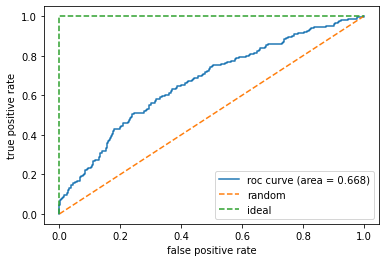

In [10]:
%matplotlib inline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score_lr = model_lr.predict_proba(X_test)[:, 1] # 検証データがクラス1に属する確率
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score_lr)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

#### 回帰係数を表示

In [11]:
pd.Series(model_lr.coef_[0], index=X_train.columns).sort_values()

racer_class_1         -0.668586
exhibition_cource_2   -0.204864
flying_1              -0.111544
flying_4              -0.108734
weather_曇り            -0.076129
                         ...   
exhibitionTime_3       0.080380
exhibition_cource_6    0.132911
1着率_1                  0.165639
exhibition_cource_5    0.171192
exhibition_cource_4    0.173335
Length: 115, dtype: float64

### 2.2 RandomForest Classification

In [12]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=100)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

#### 性能評価

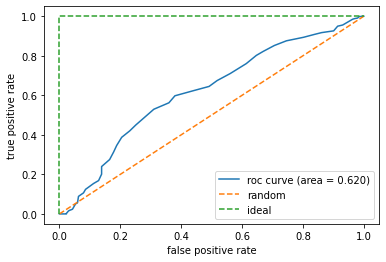

In [13]:
y_score_rf = model_rf.predict_proba(X_test)[:, 1] # 検証データがクラス1に属する確率
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score_rf)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [14]:
# 過学習の確認用
from sklearn.metrics import roc_auc_score

print('auc = ', roc_auc_score(y_true=y_train, y_score=model_rf.predict_proba(X_train)[:, 1] ))

auc =  1.0


#### パラメータ調整

In [15]:
rf_params = {
    "min_samples_split": 600,
    "max_depth": 6,
    "n_estimators": 60,
    "random_state": 100
}
# "criterion": "entropy",
# "class_weight": "balanced",

model_rf = RandomForestClassifier(**rf_params)
model_rf.fit(X_train, y_train)

print('auc_train = ', roc_auc_score(y_true=y_train, y_score=model_rf.predict_proba(X_train)[:, 1]))
print('auc_test = ', roc_auc_score(y_true=y_test, y_score=model_rf.predict_proba(X_test)[:, 1]))

auc_train =  0.7102998444893822
auc_test =  0.6408205909348331


#### 回帰係数的なものを算出

In [16]:
pd.DataFrame({"features": X_train.columns, "importance": model_rf.feature_importances_}).sort_values("importance", ascending=False)

,features,importance
2,racer_class_1,0.119500
14,1着率_1,0.109856
16,3着率_1,0.078927
17,average_start_time_1,0.063139
6,モーター3連率_1,0.044204
...,...,...
55,num_late_start_4,0.000000
54,num_false_start_4,0.000000
52,3着率_3,0.000000
47,late_3,0.000000


### 2.3 勾配ブースティング木

In [17]:
import lightgbm as lgb

params = {"num_leaves": 2,
          "n_estimators": 50,
          "class_weight": "balanced",
          "random_state": 100
         }
# "min_data_in_leaf": 

model_lgb = lgb.LGBMClassifier(**params)
model_lgb.fit(X_train, y_train)

print('auc_train = ', roc_auc_score(y_true=y_train, y_score=model_lgb.predict_proba(X_train)[:, 1]))
print('auc_test = ', roc_auc_score(y_true=y_test, y_score=model_lgb.predict_proba(X_test)[:, 1]))

y_pred_lgb = model_lgb.predict(X_test)
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred_lgb))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred_lgb))
print('precision = ', precision_score(y_true=y_test, y_pred=y_pred_lgb))
print('recall = ', recall_score(y_true=y_test, y_pred=y_pred_lgb))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred_lgb))

auc_train =  0.7058059768717343
auc_test =  0.6719491475774796
confusion matrix = 
 [[184 119]
 [120 218]]
accuracy =  0.6271450858034321
precision =  0.6468842729970327
recall =  0.6449704142011834
f1 score =  0.6459259259259259


#### 回帰係数的な

In [18]:
pd.DataFrame({"features": X_train.columns, "importance": model_lgb.feature_importances_}).sort_values("importance", ascending=False)

,features,importance
2,racer_class_1,12
14,1着率_1,7
27,exhibition_cource_2,4
50,1着率_3,4
67,weight_4,4
...,...,...
40,ボート3連率_3,0
39,ボート2連率_3,0
38,racer_class_3,0
37,num_late_start_3,0


#### 学習曲線

In [19]:
import numpy as np
from sklearn.model_selection import learning_curve

# サンプル数300刻みで検証する
train_sizes = np.arange(300, len(X_train), 300)

train_sizes, train_scores, test_scores = learning_curve(
    model_lgb, X, y, train_sizes=train_sizes, random_state=100, shuffle=False
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

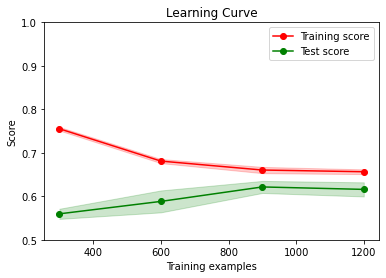

In [20]:
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

# Traing score と Test score をプロット
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")

# 標準偏差の範囲を色付け
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="r", alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="g", alpha=0.2)

plt.ylim(0.5, 1)
plt.legend(loc="best")

plt.show()